In [1]:
# I load the needed libraries
library(dplyr)
library(scales)
library(GoFKernel)

library(mvtnorm)
library(gplots)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: KernSmooth

KernSmooth 2.23 loaded
Copyright M. P. Wand 1997-2009


Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess




In [2]:
# MVTNORM FUNCTIONS
# rmvnorm(1e5, mean = x0, sigma = cov, method = c("eigen", "svd", "chol"), pre0.9_9994 = FALSE, checkSymmetry = TRUE)
# dmvnorm(x0, mean = point, sigma = cov, log = FALSE)


In [3]:
x0 = c(3, 4, 5, 6, 7)

point = c(4, 5, 6, 7, 8)

# cov = diag(1, 5)
cov = diag(1, 5) + matrix(rep(1, 5**2), nrow = 5)

cat(point, "\n", x0, "\n")
cov

4 5 6 7 8 
 3 4 5 6 7 


2,1,1,1,1
1,2,1,1,1
1,1,2,1,1
1,1,1,2,1
1,1,1,1,2


In [4]:
dmvnorm(x0, mean = point, sigma = cov, log = FALSE)


[1] 0.002719685

In [5]:
source("class_MCMC.R")

In [6]:
# Function to sampled from: n-dim gaussian with chosen sigmas and centers
posterior_g_inhom = function (theta) {

    sigmas = c(1:length(theta))
    centers = c(seq(length(theta), 1))

    product = 1
    for (i in 1:length(theta)) {
        product = product * exp(-(theta[i] - centers[i])**2/sigmas[i]**2)
    }

    return (product)

}

# The initial parameters are:
init = c(1, 2, 3)
std = diag(1, 3)
burn_in = 0
N = as.integer(1e5) + burn_in

# Evaluate then the MCMC
mcmc_g = random_steps_mvtnorm(func_wanted = posterior_g_inhom, theta_init = init, n_samples = N, sigma = std, print_accept=TRUE)

# Selecting the sequence after the burn-in
mcmc_g = mcmc_g[burn_in:N, ]


Acceptance rate =  49.564 %


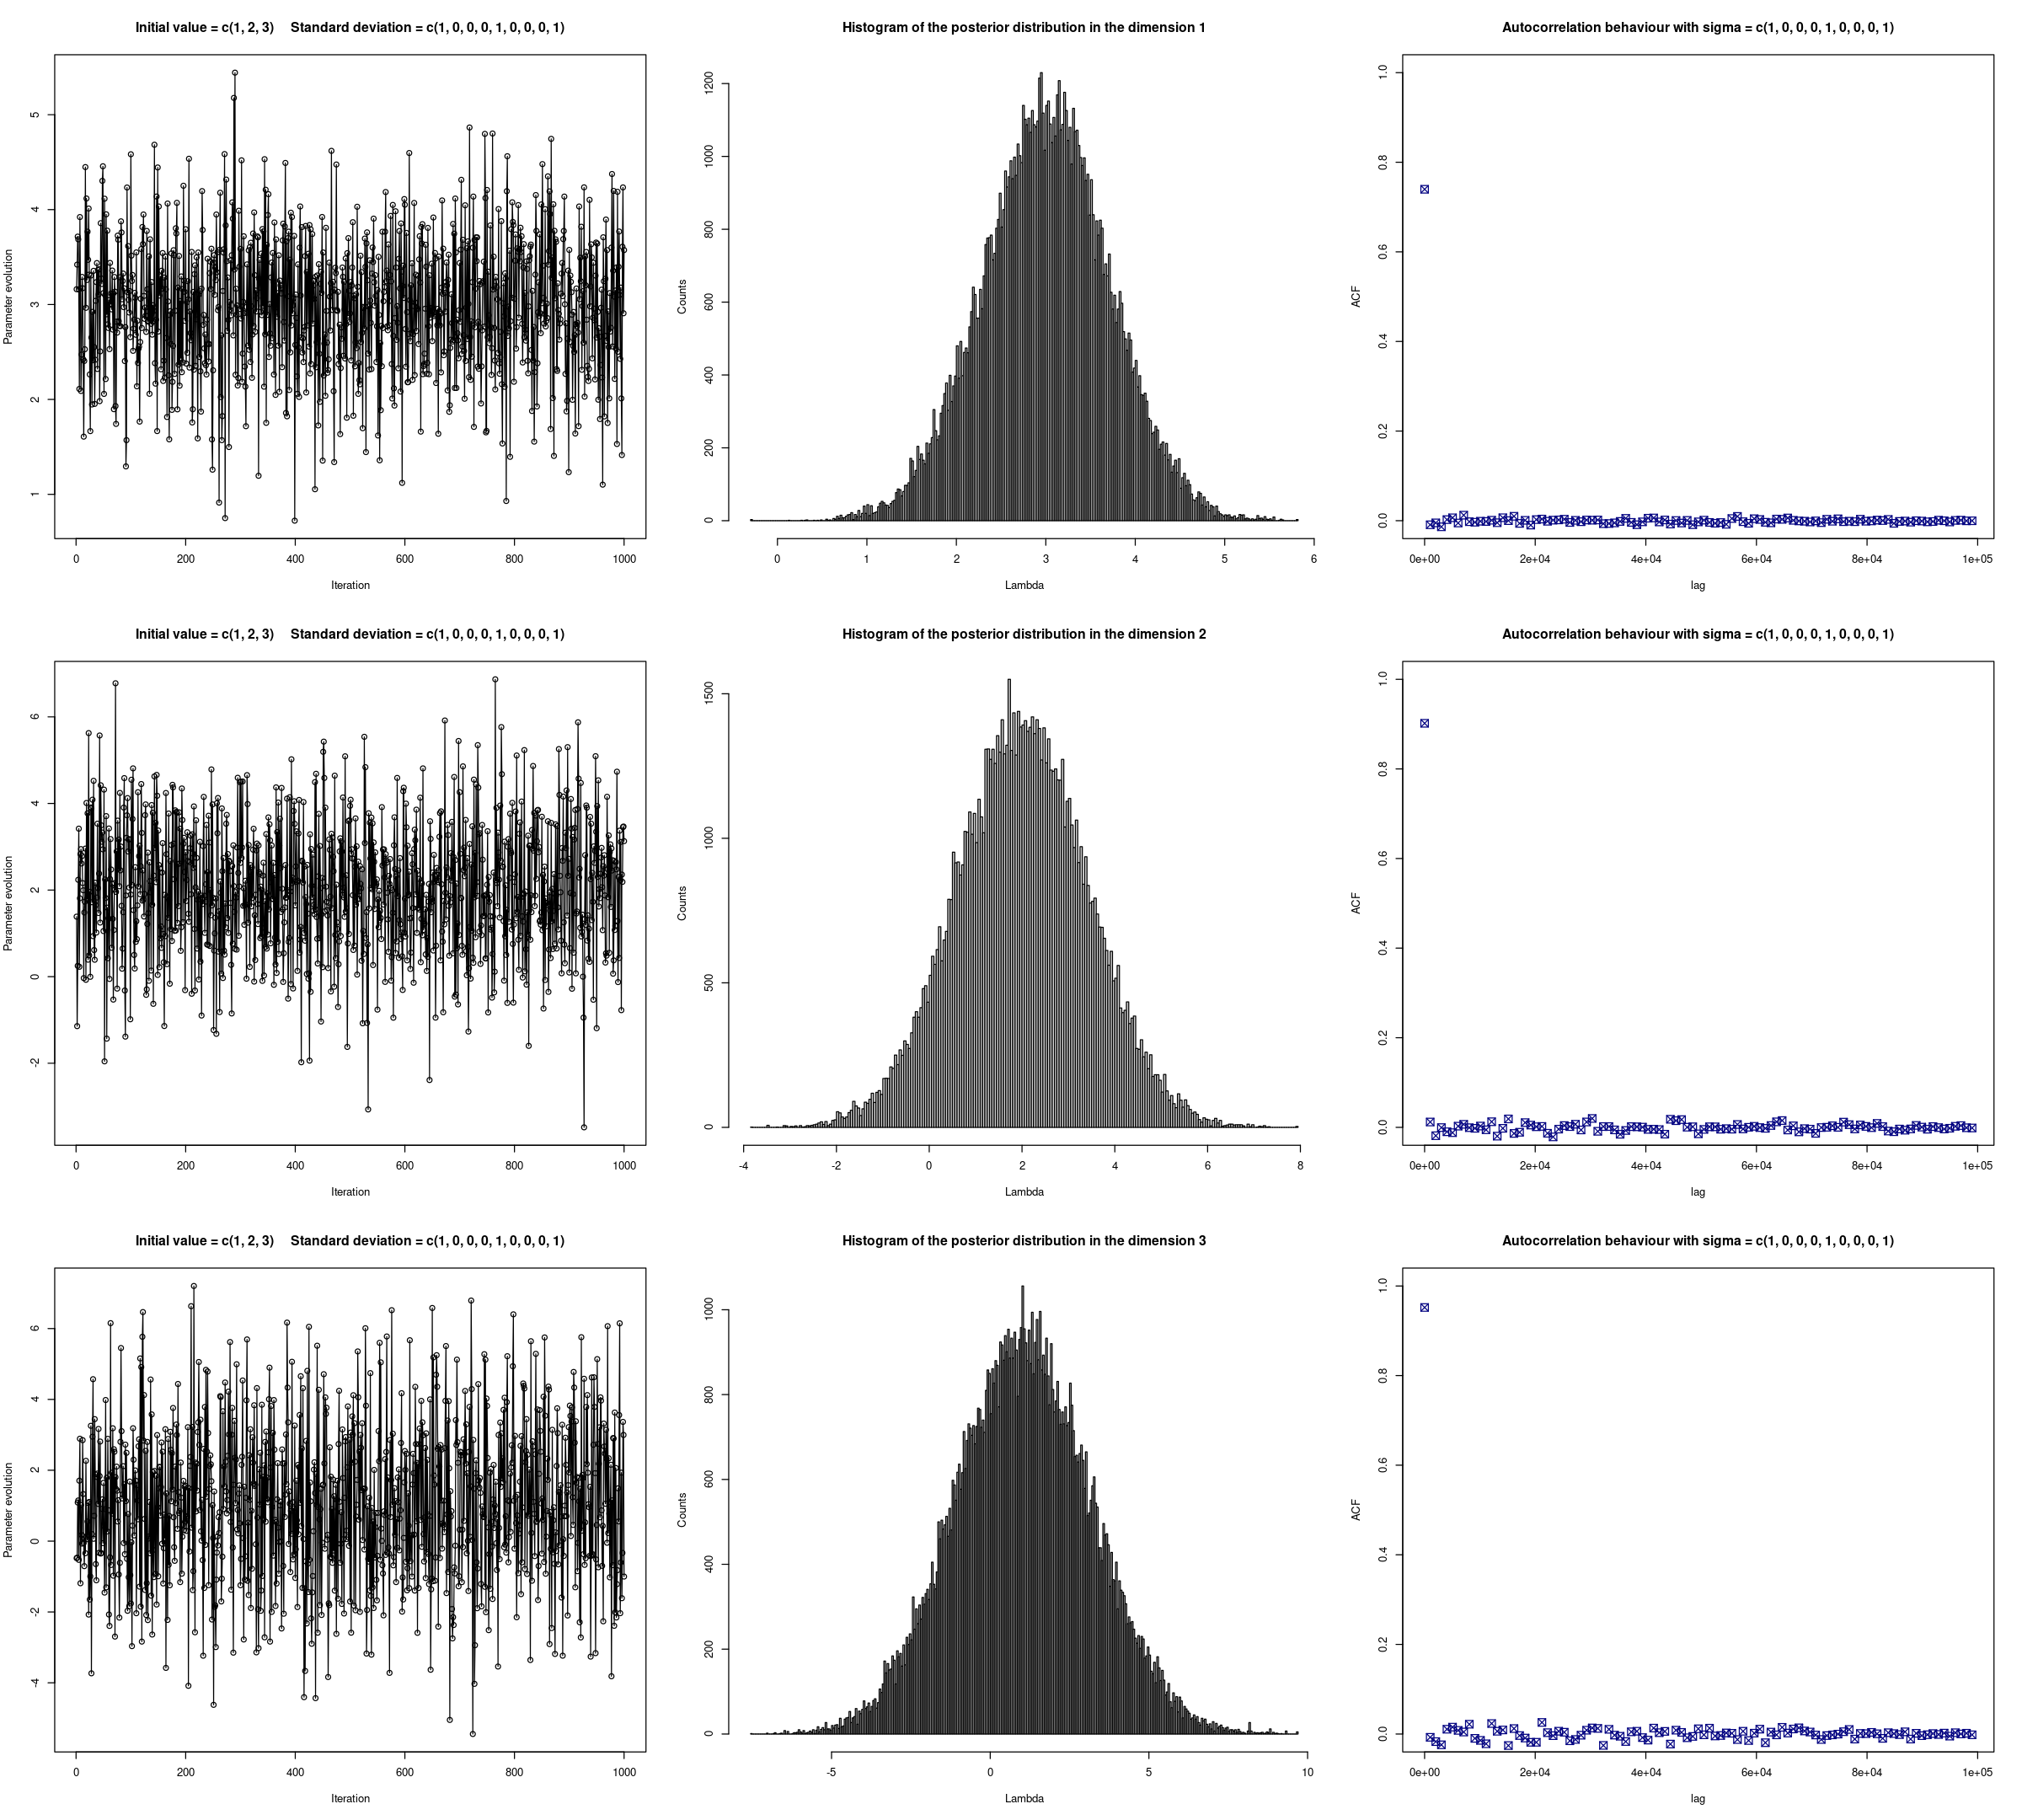

In [8]:
# Plotting the results
show_results(mcmc_g, init, std, 100)